In [2]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [66]:
data1=pd.read_csv(r'C:\Users\DELLS\OneDrive\Documents\Downloads\cab_rides.csv\cab_rides.csv')


In [67]:
data1.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [68]:
data1.shape

(693071, 10)

In [69]:
data1.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [70]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [71]:
data1.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [72]:
data1.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

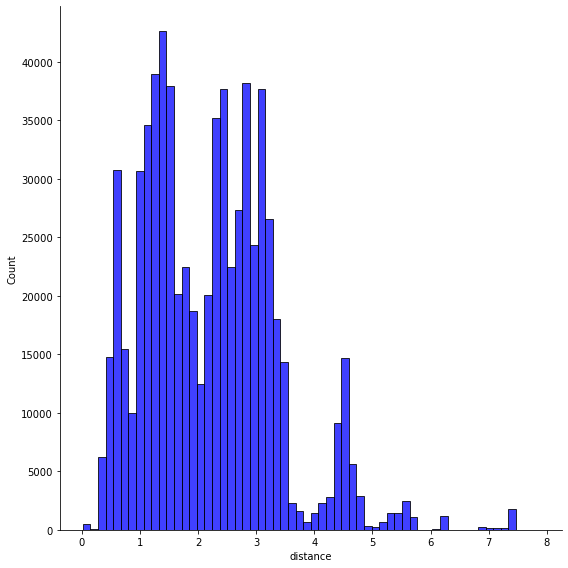

In [75]:
sns.displot(data=data1, x='distance', bins=60, color='blue', height=8)


<AxesSubplot:xlabel='price', ylabel='Density'>

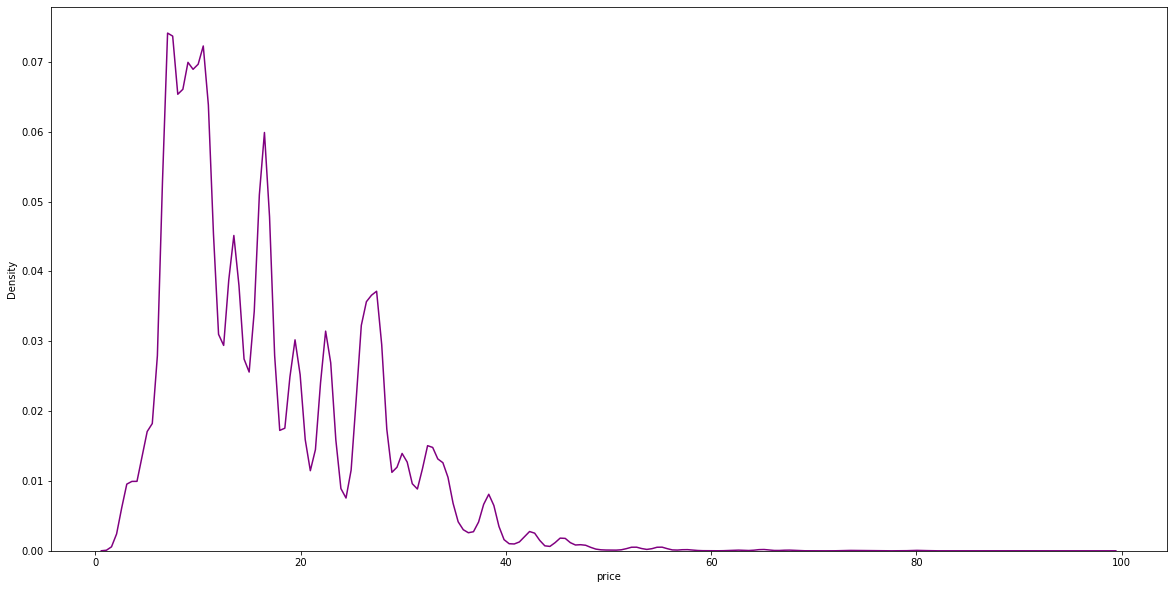

In [77]:
plt.figure(figsize=(20, 10))
sns.kdeplot(data=data1, x='price', color='purple', weights=50,levels=10, thresh=10 )

<AxesSubplot:xlabel='distance', ylabel='price'>

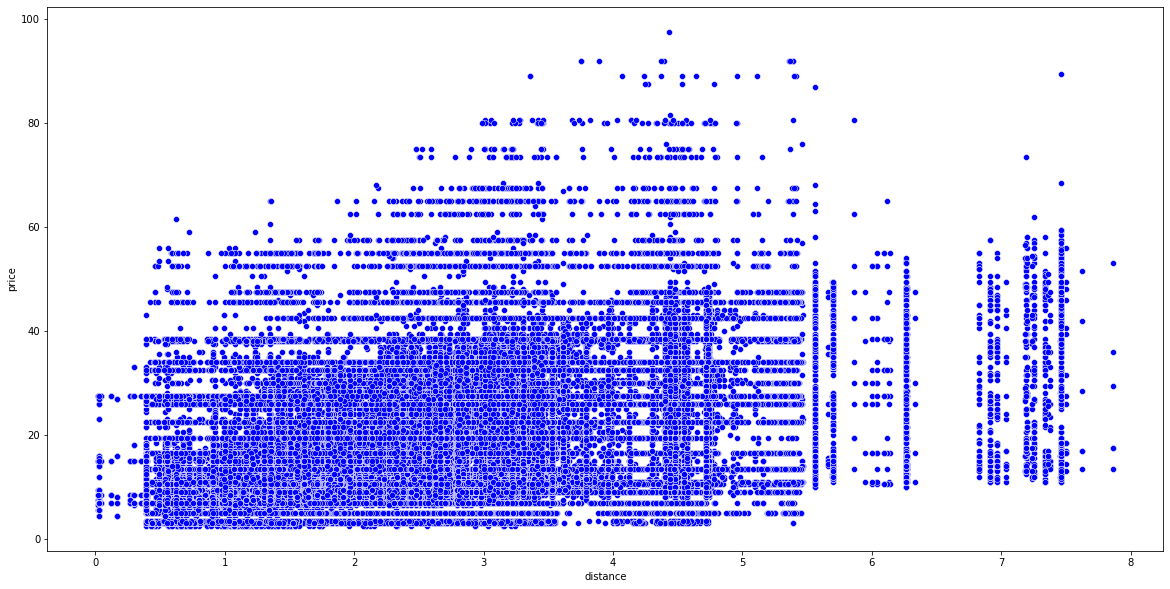

In [79]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data1, x='distance', y='price', sizes=10, ci=100, x_bins=10, y_bins=10, n_boot=1000, color='blue' )

<AxesSubplot:xlabel='destination', ylabel='price'>

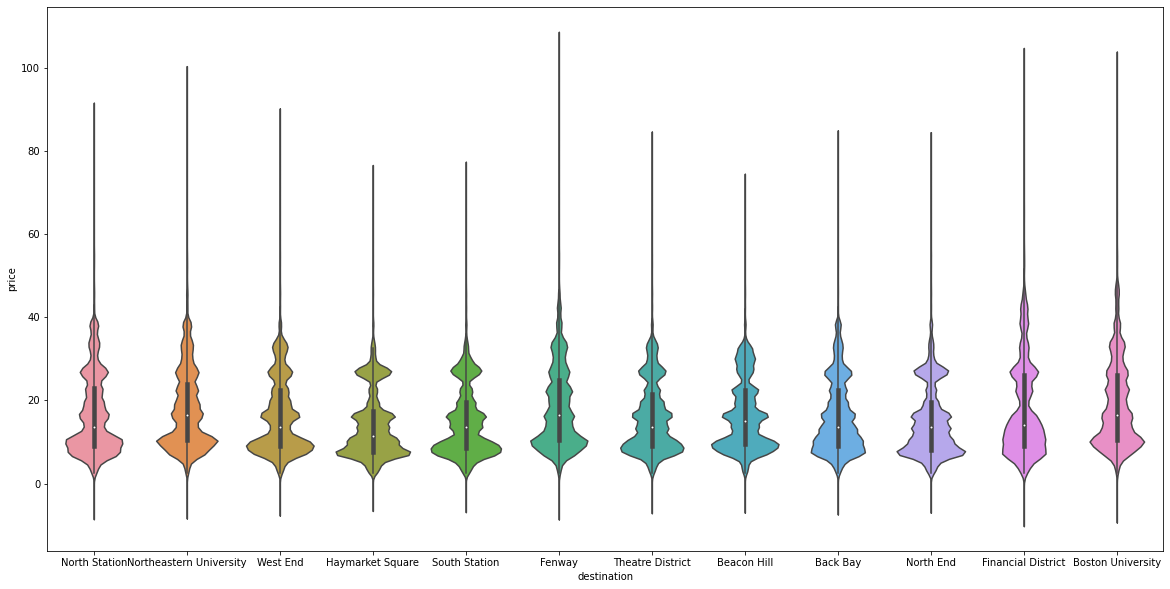

In [80]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=data1, x='destination', y='price', gridsize=100, cut=10)

In [81]:
H=data1.pivot_table(index='name', columns='destination', values='price')
H

destination,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
name,,,,,,,,,,,,
Black,19.941394,20.093579,23.733181,22.831083,22.339558,17.365883,18.286259,20.770755,22.591374,18.972113,19.267195,20.070369
Black SUV,29.574510,29.736906,32.426083,31.517861,33.310474,27.759199,28.422583,31.071885,31.398170,28.887582,29.142330,30.158193
Lux,17.484561,17.253652,21.248067,20.330094,19.337640,14.387679,15.962286,18.191187,19.498244,14.753513,17.351856,17.416804
Lux Black,22.135322,22.321748,27.596861,26.054098,25.485365,19.157426,20.320684,23.735963,24.960070,19.992623,22.238839,22.691457
Lux Black XL,31.590409,31.152215,36.524209,35.123302,35.433227,28.811548,29.757906,33.321369,34.295515,29.051171,30.985667,31.765086
Lyft,9.243392,9.476673,11.074139,10.682670,10.568260,8.120836,8.599672,9.761549,10.353391,8.522096,9.405075,9.499647
Lyft XL,15.016374,14.984802,18.240689,17.343208,16.882575,12.587046,13.531038,15.512438,16.735972,12.766745,15.007166,15.064486
Shared,5.870058,6.100495,7.226751,6.823770,6.264578,4.923500,5.327711,6.093817,6.640900,5.201405,5.864427,6.016121
UberPool,8.873203,8.727313,9.969077,9.298192,8.845568,7.922491,8.231758,8.412373,9.561860,8.297559,8.547092,8.338316


<AxesSubplot:xlabel='destination', ylabel='name'>

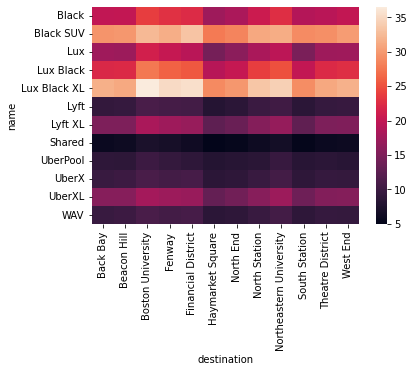

In [82]:
sns.heatmap(H)